### Import packages for statistical analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
%matplotlib inline

### Load the Boston data set and check the columns

In [3]:
boston = sm.datasets.get_rdataset('Boston', 'MASS')
boston_df = boston.data

In [4]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Fit a simple linear regression model of `lstat` to `medv`

In [5]:
y, X = dmatrices('medv  ~ lstat', data=boston_df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()

Summary of the result of the regression:

In [6]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        09:40:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Confidence intervals of the coefficients:

In [7]:
res.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


Predict `medv` for `lstat = [5, 10, 15]`:

In [8]:
res.predict([[1, 5], [1, 10], [1, 15]])

array([29.80359411, 25.05334734, 20.30310057])

Plot the data and regression line

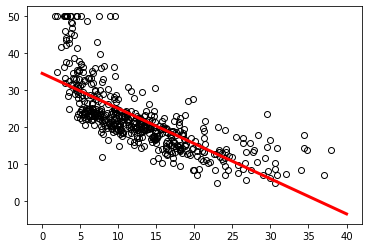

In [9]:
plt_num = 50
X_plot = np.stack([np.ones(plt_num), np.linspace(0, 40, num=plt_num)], axis=1)
plt.plot(X['lstat'], y, 'ko', markerfacecolor='none')
plt.plot(X_plot[:, 1], res.predict(X_plot), 'r', linewidth=3)
plt.show()

Create a $2 \times 2$ figure similar to running `par(mfrow=c(2,2))` and `plot(lm.fit)` in R

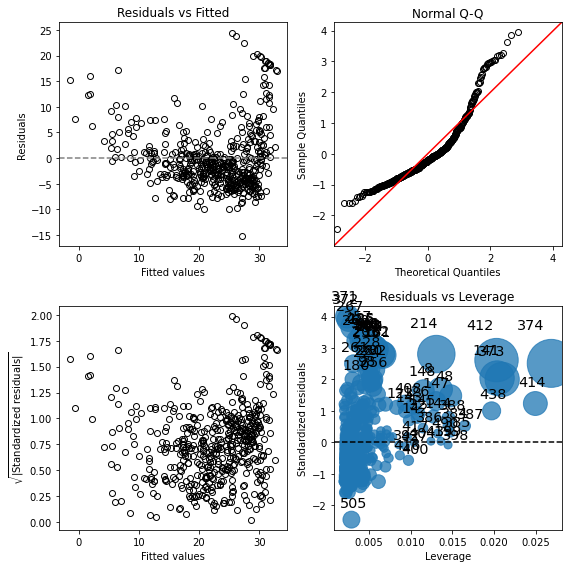

In [57]:
fig, ax = plt.subplots(2, 2, figsize=[8, 8])

residuals = res.resid

ax[0,0].plot(res.predict(), residuals, 'ko', markerfacecolor='none')
ax[0,0].axhline(0, color='grey', linestyle='--')
ax[0,0].set_xlabel('Fitted values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted')

sm.qqplot(residuals, ax=ax[0,1], fit=True, line='45', color='k', markerfacecolor='none')
ax[0,1].set_title('Normal Q-Q')

ax[1,0].plot(res.predict(), np.sqrt(np.abs(res.resid_pearson)), 'ko', markerfacecolor='none')
ax[1,0].set_xlabel('Fitted values')
ax[1,0].set_ylabel('$\\sqrt{|\\mathrm{Standardized \; residuals}|}$')

sm.graphics.influence_plot(res, ax=ax[1,1])
ax[1,1].set_title('Residuals vs Leverage')
ax[1,1].set_xlabel('Leverage', size='medium')
ax[1,1].set_ylabel('Standardized residuals', size='medium')
ax[1,1].axhline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()

### Multiple linear regression

Fit a linear regression model with `lstat` and `age`

In [60]:
y2, X2 = dmatrices('medv ~ lstat + age', data=boston_df, return_type='dataframe')
mod2 = sm.OLS(y2, X2)
res2 = mod2.fit()

In [62]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.98e-88
Time:                        10:17:24   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [68]:
y3, X3 = dmatrices('medv ~ ' + ' + '.join(boston_df.columns[:-1]), 
                   data=boston_df, return_type='dataframe')
mod3 = sm.OLS(y3, X3)
res3 = mod3.fit()

In [69]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        10:26:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### Interaction terms

Model example with an interaction between `lstat` and `age`

In [71]:
yi, Xi = dmatrices('medv ~ lstat * age', data=boston_df, return_type='dataframe')
print(sm.OLS(yi, Xi).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           4.86e-88
Time:                        10:36:04   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### Nonlinear transformations of predictors

In [75]:
yn, Xn = dmatrices('medv ~ lstat + I(lstat ** 2)', data=boston_df, return_type='dataframe')
print(sm.OLS(yn, Xn).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          1.56e-112
Time:                        10:39:32   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149